# Exploratory Data Analysis - MySejahtera

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import math
import pickle

from imblearn.over_sampling import SMOTE
from collections import Counter

In [2]:
# Loading mysejahtera datasets
checkin_malaysia = pd.read_csv('dataset/mysejahtera/checkin_malaysia.csv')
checkin_malaysia_time = pd.read_csv('dataset/mysejahtera/checkin_malaysia_time.csv')
checkin_state = pd.read_csv('dataset/mysejahtera/checkin_state.csv')
trace_malaysia = pd.read_csv('dataset/mysejahtera/trace_malaysia.csv')

### Useful custom functions

#### Get Missing Value functions

Shows rows with missing value from a given dataframe

In [3]:
def get_nan(df):
    missing_value = df[df.isna().values.any(axis=1)]
    rows = missing_value.shape[0]
    print(rows, "rows with missing values")
    
    if rows > 0:
        print(df.isna().sum(), "\n")
        
def visual_nan(df, name=""):
    missing_value = df.isna().melt(value_name="missing")

    ax = sns.displot(data=missing_value,
                     y="variable",
                     hue="missing",
                     multiple="fill",
                     aspect=1.25)
    plt.xlabel('proportion of missing value')
    plt.title(f"Missing values of {name}")

    return ax

#### Outlier Detection functions

Plots the outlier for each numeric column in a dataframe

In [4]:
def check_outlier(df):
    numeric_columns = df.describe().columns.copy()
    num_of_columns = len(numeric_columns)
    
    for i in range(math.ceil(num_of_columns/2)):
        c = 2*i
        
        plt.figure(figsize=(20,2))
        plt.subplot(1, 2, 1)
        plot_boxplot(df[numeric_columns[c]], xlabel=numeric_columns[c])
        plt.subplot(1, 2, 2)
        try:
            plot_boxplot(df[numeric_columns[c+1]], xlabel=numeric_columns[c+1])
        except IndexError:
            plt.xticks([]), plt.yticks([])
            plt.axis("off")
        plt.show()
    
def plot_boxplot(series, title='', xlabel=''):
    bp = sns.boxplot(x=series)
    bp.set(title=title,
           xlabel=xlabel)
    return bp

## checkin_malaysia.csv

Daily checkins on MySejahtera at country level

1. `date`: yyyy-mm-dd format; data correct as of 2359hrs on that date
2. `checkins`: number of checkins at all locations registered on MySejahtera
3. `unique_ind`: number of unique accounts which checked in
4. `unique_loc`: number of unique premises checked into

In [5]:
checkin_malaysia.head()

,date,checkins,unique_ind,unique_loc
0,2020-12-01,17492265,6614474,630363
1,2020-12-02,17695726,6667261,648752
2,2020-12-03,17063123,6549583,645604
3,2020-12-04,18350879,6803979,622383
4,2020-12-05,19711082,6845366,573132


In [6]:
checkin_malaysia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        309 non-null    object
 1   checkins    309 non-null    int64 
 2   unique_ind  309 non-null    int64 
 3   unique_loc  309 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 9.8+ KB


Checking for null values in checkin_malaysia.

In [7]:
get_nan(checkin_malaysia)

0 rows with missing values


Checking for outliers in checkin_malaysia

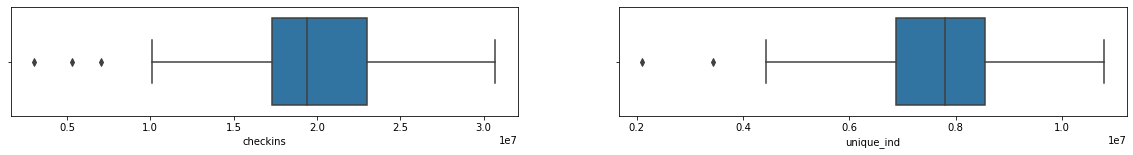

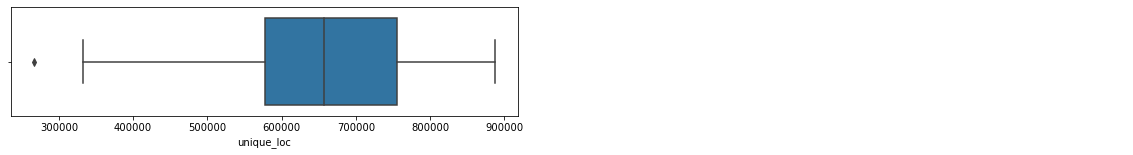

In [8]:
check_outlier(checkin_malaysia)

In [9]:
checkin_malaysia[checkin_malaysia.duplicated()]

,date,checkins,unique_ind,unique_loc


In [77]:
# plots barplot according to date with given column
def info_by_date(df, column=None):
    try:
        #plt.figure(figsize=(50,20))
        #sns.lineplot(x='date', y=column, data=df)
        fig = px.line(df, x='date', y=column)
        #plt.show()
        fig.show()
    except Exception as ex:
        print(ex)
        return None
    
    # day with least checkins
    print(f'The day with least {column}:')
    display(pd.DataFrame(df.iloc[df[column].argmin()]).T)

    # day with most checkins
    print(f'The day with most {column}:')
    display(pd.DataFrame(df.iloc[df[column].argmax()]).T)

info_by_date(checkin_malaysia, 'checkins')

The day with least checkins:


,date,checkins,unique_ind,unique_loc
180,2021-05-30,2999182,2106959,266148


The day with most checkins:


,date,checkins,unique_ind,unique_loc
123,2021-04-03,30683901,9522743,732473


In [78]:
info_by_date(checkin_malaysia, 'unique_ind') # unique checkin individuals

The day with least unique_ind:


,date,checkins,unique_ind,unique_loc
180,2021-05-30,2999182,2106959,266148


The day with most unique_ind:


,date,checkins,unique_ind,unique_loc
308,2021-10-05,28991261,10785507,887285


In [79]:
info_by_date(checkin_malaysia, 'unique_loc') # unique checkin locations

The day with least unique_loc:


,date,checkins,unique_ind,unique_loc
180,2021-05-30,2999182,2106959,266148


The day with most unique_loc:


,date,checkins,unique_ind,unique_loc
308,2021-10-05,28991261,10785507,887285


The day with the least `checkins`, `unique_ind`, and `unique_loc` is **2021-05-30**. Something must have happen during this day that causes this phenomena. Maybe there is a reason behind this that we can mine from the Epidemic dataset.

The day with the most `checkins` is **2021-04-03**, while the day with the most `unique_ind` and `unique_loc` is **2021-10-05**.

Text(0.5, 1.0, 'Malaysia')

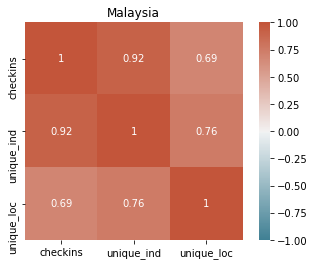

In [13]:
corr_malaysia = checkin_malaysia.corr()
sns.heatmap(corr_malaysia, square=True, annot=True, vmin=-1, vmax=1, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Malaysia')

## checkin_state.csv

Daily checkins on MySejahtera at state level

1. `date`: yyyy-mm-dd format; data correct as of 2359hrs on that date
2. `state`: state
3. `checkins`: number of checkins at all locations registered on MySejahtera
4. `unique_ind`: number of unique accounts which checked in
5. `unique_loc`: number of unique premises checked into

In [14]:
checkin_state.head()

,date,state,checkins,unique_ind,unique_loc
0,2020-12-01,Johor,1996696,868521,81635
1,2020-12-01,Kedah,654634,341620,32760
2,2020-12-01,Kelantan,186507,108035,16298
3,2020-12-01,Melaka,544619,241854,21458
4,2020-12-01,Negeri Sembilan,559390,266899,22749


In [15]:
checkin_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4944 entries, 0 to 4943
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        4944 non-null   object
 1   state       4944 non-null   object
 2   checkins    4944 non-null   int64 
 3   unique_ind  4944 non-null   int64 
 4   unique_loc  4944 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 193.2+ KB


In [16]:
states = checkin_state['state'].unique()

print(states)
print(len(states))

['Johor' 'Kedah' 'Kelantan' 'Melaka' 'Negeri Sembilan' 'Pahang' 'Perak'
 'Perlis' 'Pulau Pinang' 'Sabah' 'Sarawak' 'Selangor' 'Terengganu'
 'W.P. KualaLumpur' 'W.P. Labuan' 'W.P. Putrajaya']
16


There is **16** unique states that are recorded in this dataset.

They are: Johor, Kedah, Kelantan, Melaka, Negeri Sembilan, Pahang, Perak, Perlis, Pulau Pinang, Sabah, Sarawak, Selangor, Terengganu, W.P. KualaLumpur, W.P. Labuan, W.P. Putrajaya

In [17]:
get_nan(checkin_state)

0 rows with missing values


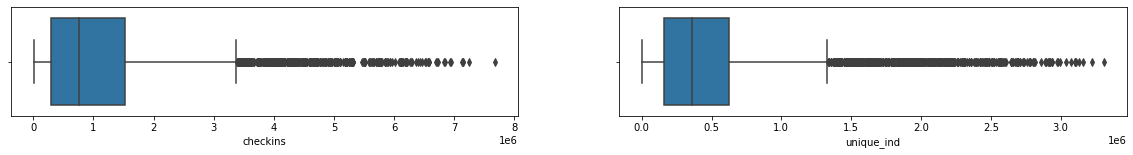

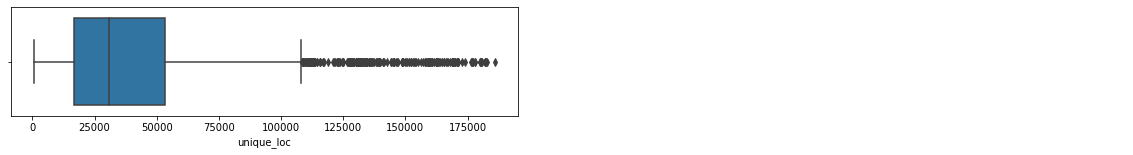

In [18]:
check_outlier(checkin_state)

In [19]:
checkin_state[checkin_state.duplicated()]

,date,state,checkins,unique_ind,unique_loc


Logically, the total number of checkins per day should be the same with the data from checkin_malaysia.csv. 

However, it does not seem like that in this case. We can assume there are some states that are not listed here, causing the abnormality.

In [21]:
checkin_state.groupby('date').sum().head()

,checkins,unique_ind,unique_loc
date,,,
2020-12-01,16828733,7690065,602107
2020-12-02,17013424,7746974,620128
2020-12-03,16413309,7599791,617183
2020-12-04,17660005,7988869,594605
2020-12-05,18938178,8126899,546615


In [20]:
checkin_malaysia.head()

,date,checkins,unique_ind,unique_loc
0,2020-12-01,17492265,6614474,630363
1,2020-12-02,17695726,6667261,648752
2,2020-12-03,17063123,6549583,645604
3,2020-12-04,18350879,6803979,622383
4,2020-12-05,19711082,6845366,573132


Let's take a look at the barplot of each attributes among all states.

<AxesSubplot:xlabel='state', ylabel='unique_loc'>

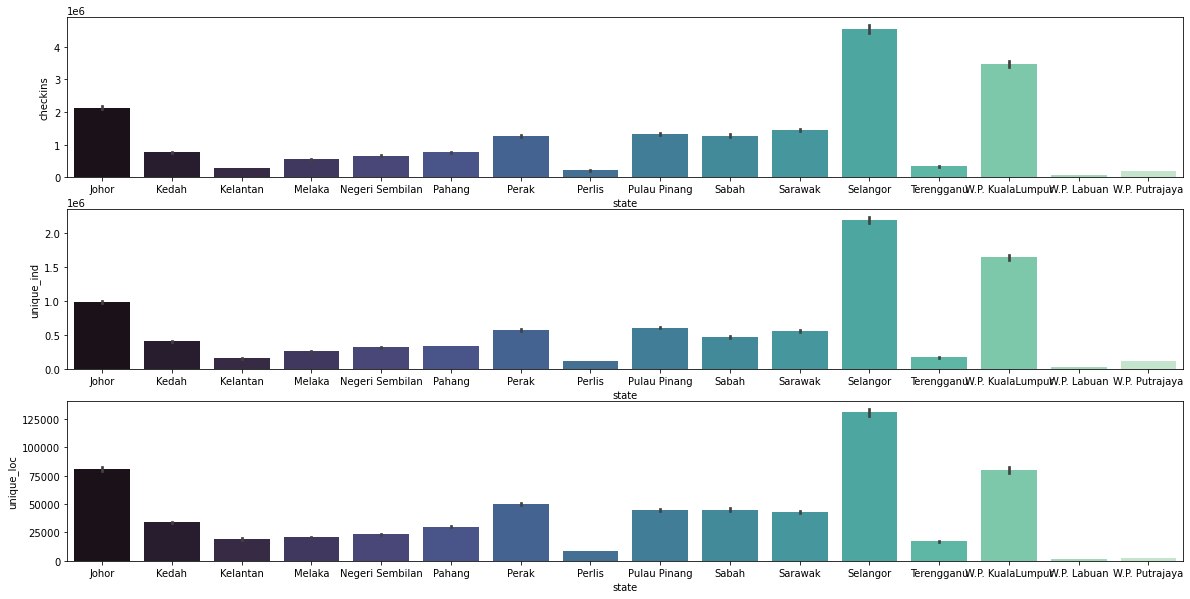

In [23]:
plt.figure(figsize=(20, 10))
plt.subplot(311)
sns.barplot(x='state', y='checkins', data=checkin_state, palette='mako')
plt.subplot(312)
sns.barplot(x='state', y='unique_ind', data=checkin_state, palette='mako')
plt.subplot(313)
sns.barplot(x='state', y='unique_loc', data=checkin_state, palette='mako')

From the graph we can observe that Selangor has the most `checkins`, `unique_ind`, and `unique_loc`, followed up by Johor and Kuala Lumpur. Labuan has the least of all three attributes.

Let's use boxplot to see the distribution of each attributes among the 16 states.

In [94]:
def bp_by_state(df, column=''):
    try:
        plt.figure(figsize=(20,10))
        sns.boxplot(x='state', y=column, data=df, orient='v', palette='mako')
        plt.show()
    except Exception as ex:
        print(ex)

# using plotly go
def bp_by_state_go(df, column=''):
    try:
        fig = px.box(df, x='state', y=column)
        fig.show()
    except Exception as ex:
        print(ex)
        
        
bp_by_state_go(checkin_state, 'checkins')

In [95]:
bp_by_state_go(checkin_state, 'unique_ind')

In [96]:
bp_by_state_go(checkin_state, 'unique_loc')

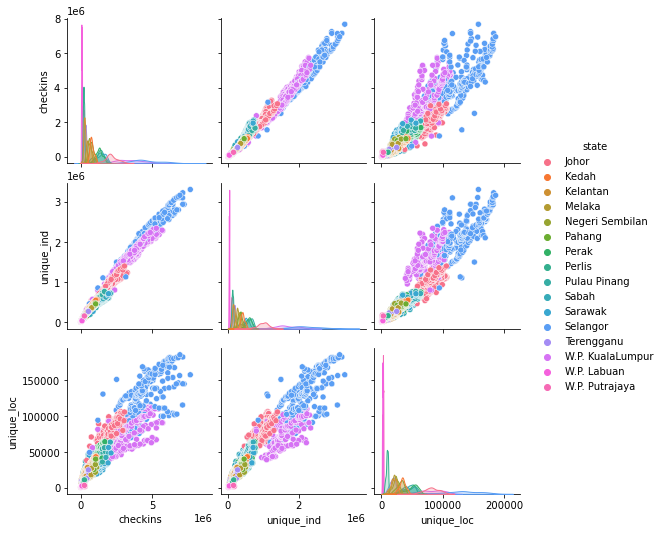

In [27]:
sns.pairplot(data=checkin_state, hue='state')

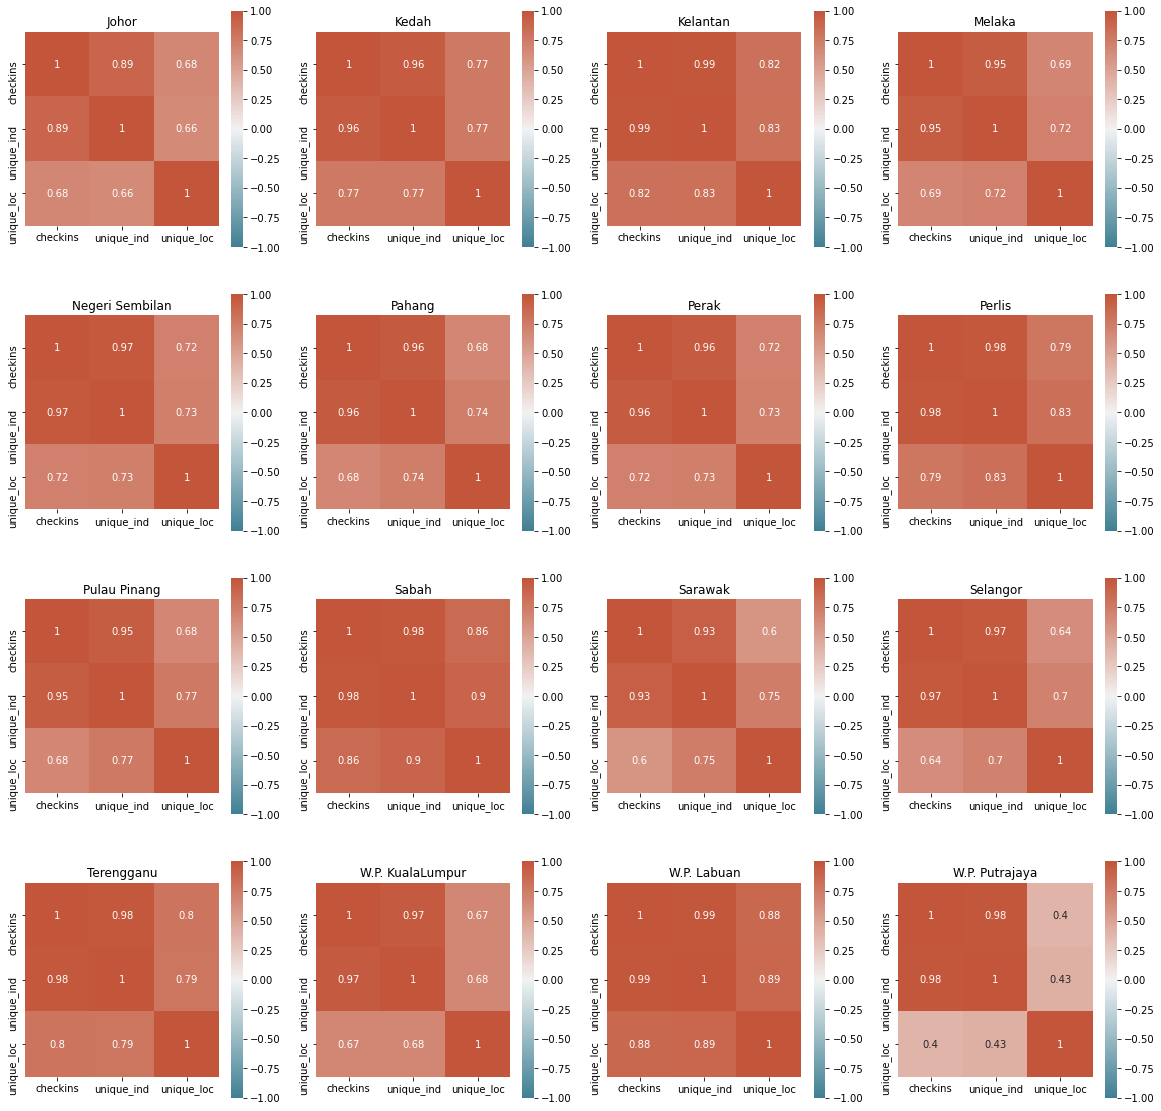

In [28]:
plt.figure(figsize=(20, 20))
for i, state in enumerate(states):
    df_state = checkin_state[checkin_state['state'] == state].copy()
    corr_state = df_state.corr()
    
    plt.subplot(4, 4, i+1)
    sns.heatmap(corr_state, square=True, annot=True, vmin=-1, vmax=1, cmap=sns.diverging_palette(220, 20, as_cmap=True))
    plt.title(state)

## checkin_malaysia_time.csv

Time distribution of daily checkins on MySejahtera at country level

1. `date`: yyyy-mm-dd format; data correct as of 2359hrs on that date
2. `i`: in the time density file, checkins are aggregated by half-hour buckets, giving 48 in total; bucket `i` corresponds to the ith half-hour slot of the day. for instance, `i = 0` corresponds to 0000 - 0029; `i = 31` corresponds to 1500 - 1529.

In [29]:
checkin_malaysia_time.head()

,date,0,1,2,3,4,5,6,7,8,...,38,39,40,41,42,43,44,45,46,47
0,2020-12-01,6395,4052,2611,2005,1660,1574,1371,1421,1736,...,533079,499436,484926,400220,287114,165690,95964,58921,34247,15906
1,2020-12-02,6615,3957,2682,1974,1721,1581,1438,1480,1867,...,539724,503532,483593,397703,287540,165463,96497,60809,35813,16608
2,2020-12-03,6920,3943,2936,2150,1755,1490,1499,1590,1842,...,521526,492463,468638,381225,275301,159941,95561,61119,36086,17350
3,2020-12-04,7404,4759,3064,2223,1791,1699,1543,1614,2115,...,587843,562922,552979,464684,347722,211850,128239,81293,48715,23330
4,2020-12-05,9520,5907,3871,2662,2181,1769,1727,1718,2237,...,638364,607971,597757,501530,375434,229508,138917,89817,53057,26056


In [30]:
get_nan(checkin_malaysia_time)

0 rows with missing values


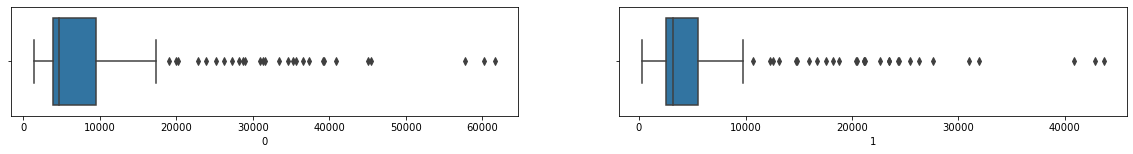

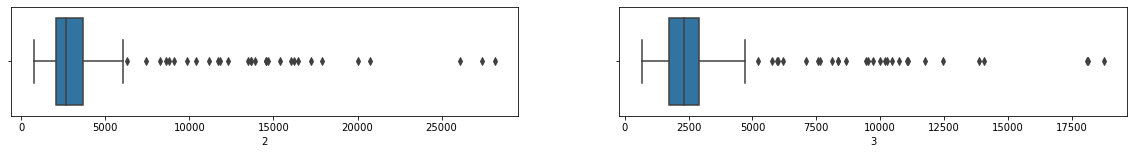

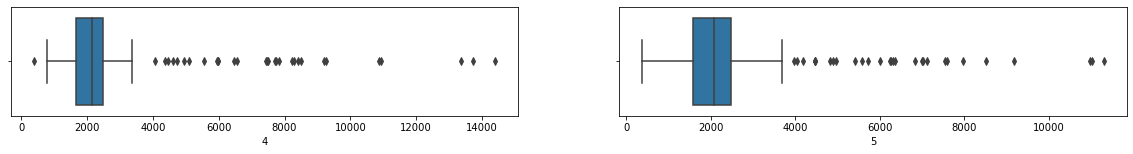

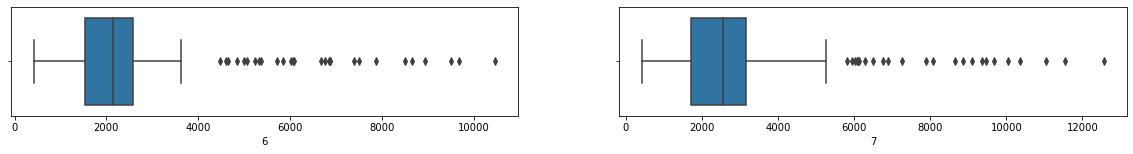

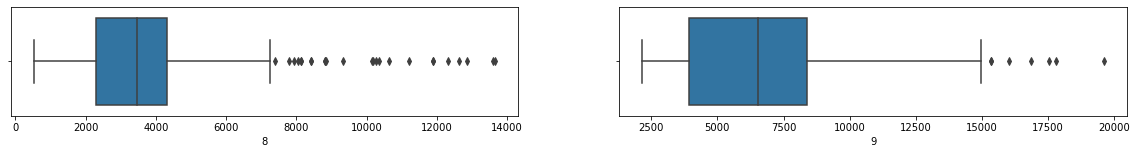

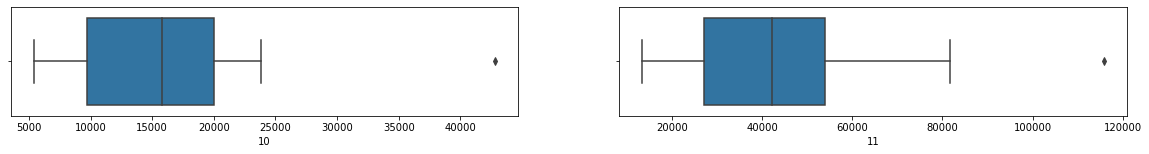

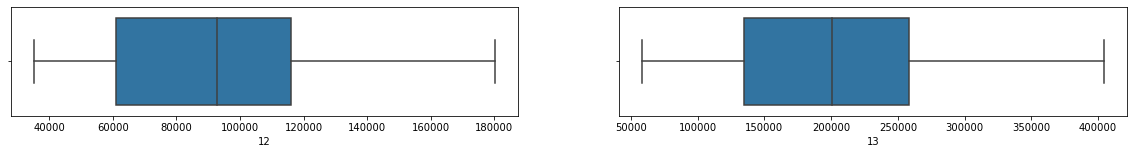

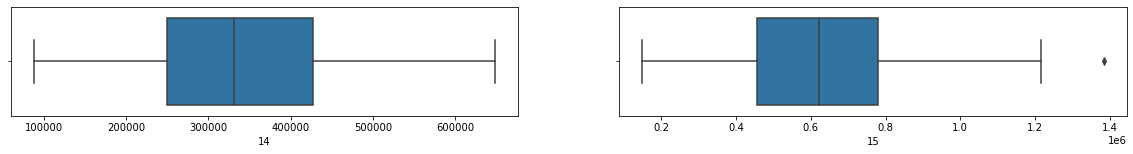

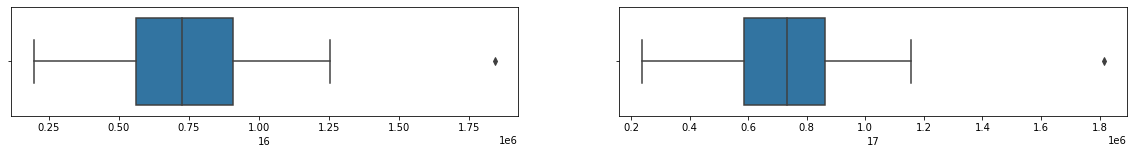

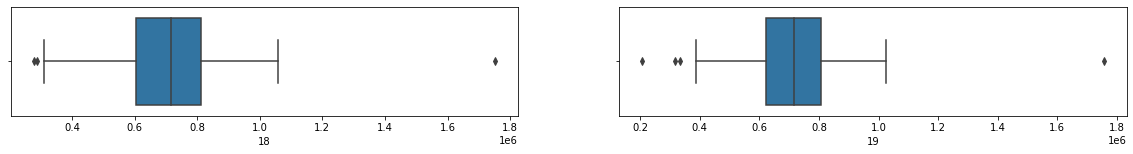

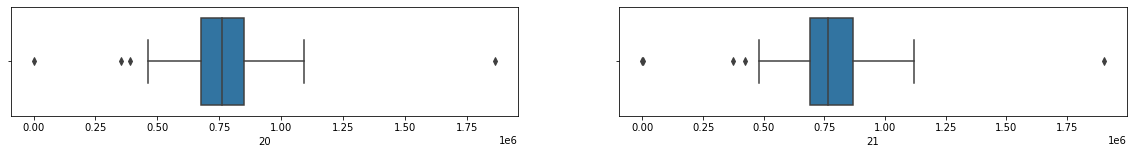

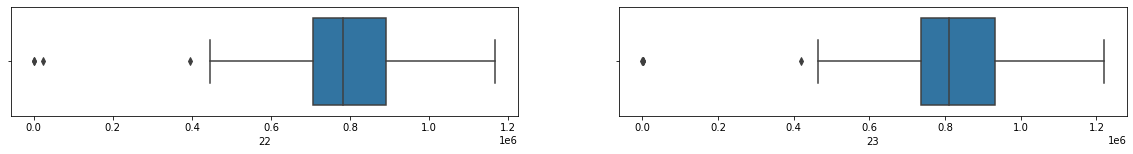

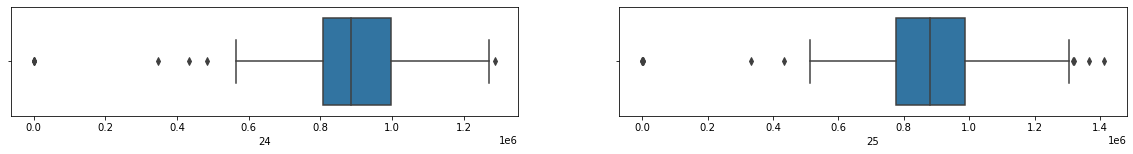

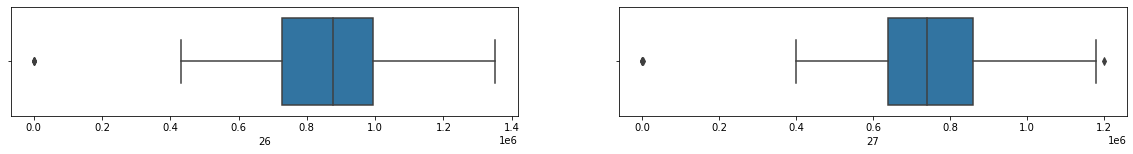

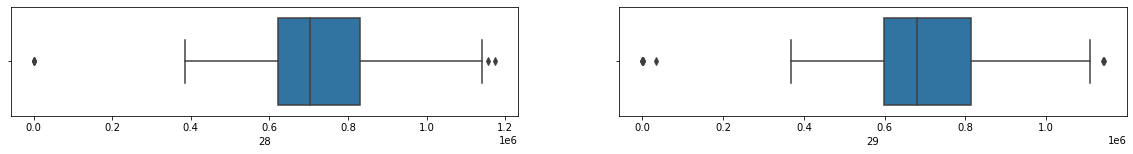

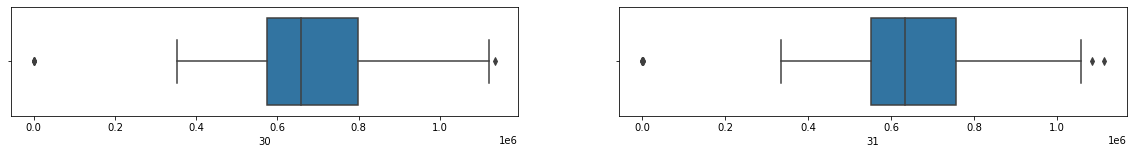

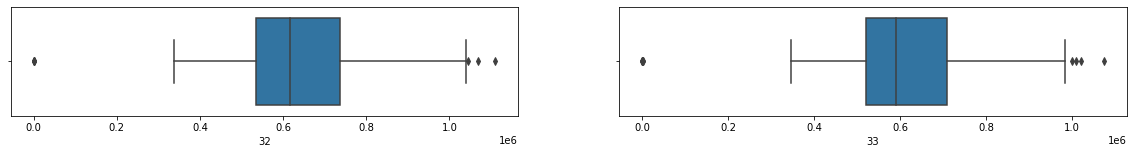

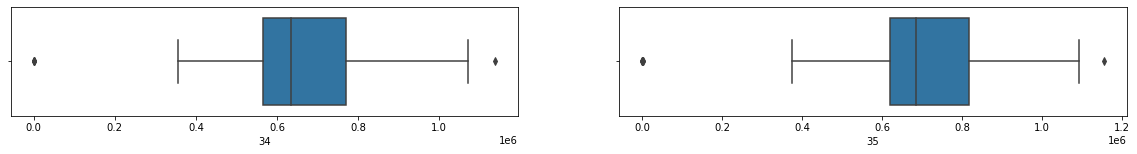

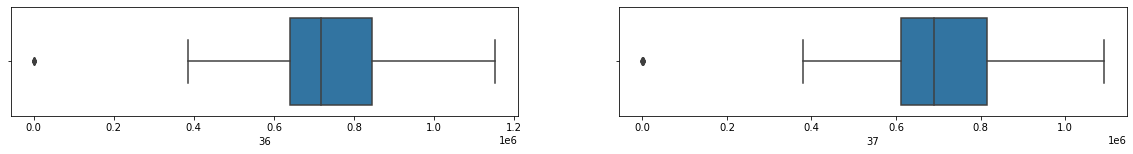

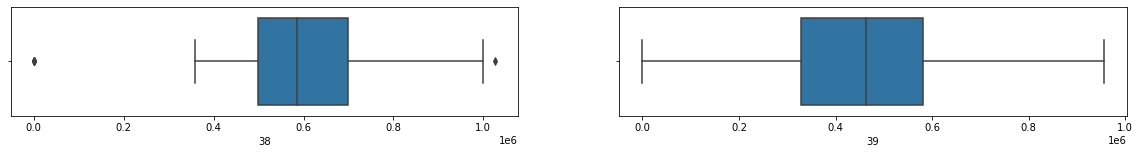

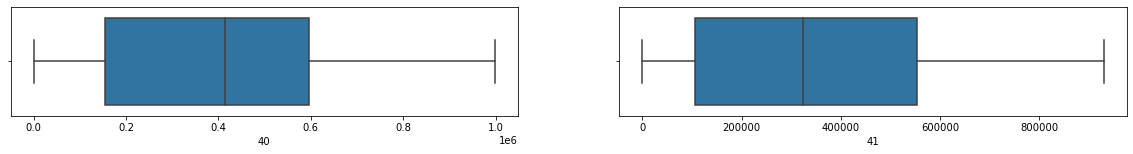

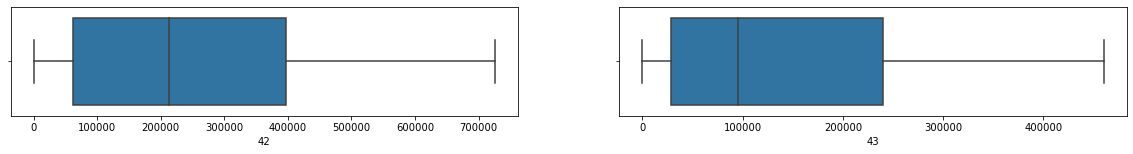

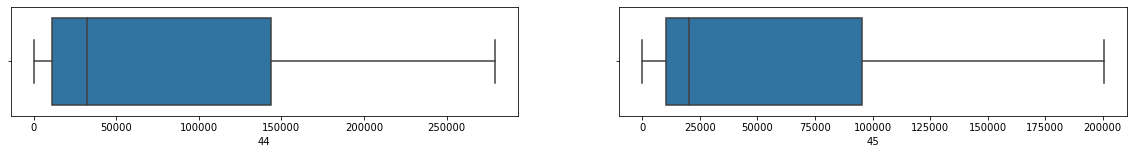

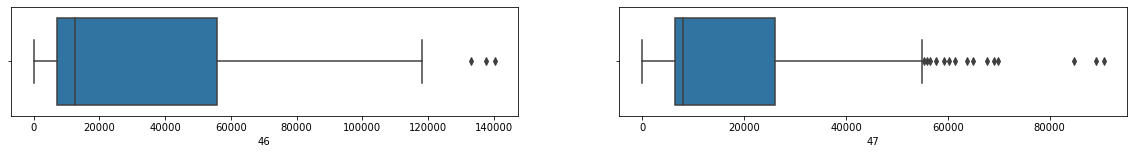

In [31]:
check_outlier(checkin_malaysia_time)

In [32]:
checkin_malaysia_time[checkin_malaysia_time.duplicated()]

,date,0,1,2,3,4,5,6,7,8,...,38,39,40,41,42,43,44,45,46,47


Now we try to check if the cases per day sums up correctly. We do this by summing up all the reported cases per day.

In [33]:
checkin_malaysia_time.sum(axis=1, skipna=True).head()

0    17492265
1    17695726
2    17063123
3    18350879
4    19711082
dtype: int64

It seems like the number of checkins in checkin_malaysia and checkin_malaysia_time do match.

Therefore we can conclude that the actual number of checkins per day in Malaysia can be retrieve from either checkin_malaysia or checkin_malaysia_time. checkin_states shows all the checkins per state but not all states are present in the available dataset.

In [34]:
checkin_malaysia_time

,date,0,1,2,3,4,5,6,7,8,...,38,39,40,41,42,43,44,45,46,47
0,2020-12-01,6395,4052,2611,2005,1660,1574,1371,1421,1736,...,533079,499436,484926,400220,287114,165690,95964,58921,34247,15906
1,2020-12-02,6615,3957,2682,1974,1721,1581,1438,1480,1867,...,539724,503532,483593,397703,287540,165463,96497,60809,35813,16608
2,2020-12-03,6920,3943,2936,2150,1755,1490,1499,1590,1842,...,521526,492463,468638,381225,275301,159941,95561,61119,36086,17350
3,2020-12-04,7404,4759,3064,2223,1791,1699,1543,1614,2115,...,587843,562922,552979,464684,347722,211850,128239,81293,48715,23330
4,2020-12-05,9520,5907,3871,2662,2181,1769,1727,1718,2237,...,638364,607971,597757,501530,375434,229508,138917,89817,53057,26056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,2021-10-01,7821,5105,3883,3326,2868,2943,3133,4020,5489,...,885978,746392,656259,499469,359618,219907,135673,91499,54172,26920
305,2021-10-02,9803,5870,4326,3733,3364,3349,3434,3946,5467,...,951402,799659,715576,552503,396788,251826,158516,107755,64681,31585
306,2021-10-03,10606,6424,4434,3600,3101,3010,3154,3492,4958,...,919376,757028,666552,502586,357593,211703,124464,81709,46359,22279
307,2021-10-04,7897,4381,3630,2856,2553,2469,2533,3192,4583,...,843458,711455,627603,464110,325730,189482,115210,74981,44099,19846


<AxesSubplot:>

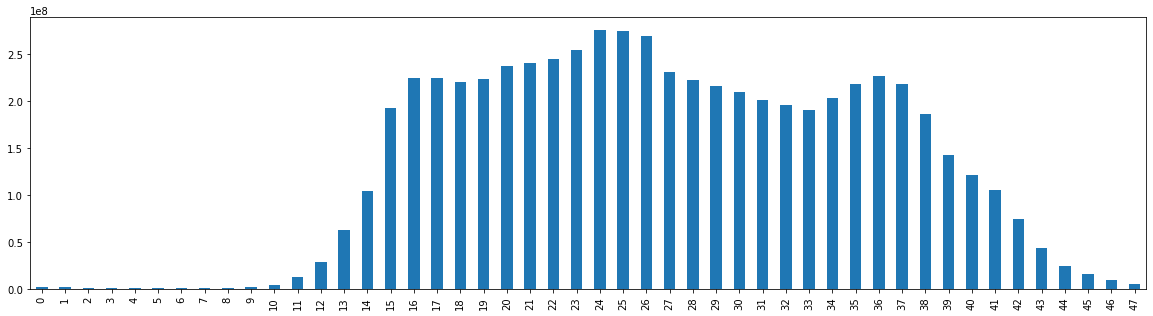

In [118]:
time = [str(x) for x in np.arange(48)]
plt.figure(figsize=(20,5))
checkin_malaysia_time[time].sum().plot(kind='bar')

In [116]:
checkin_time = pd.DataFrame(checkin_malaysia_time[time].sum())
checkin_time.insert(0, 'time', [f'{x:02d}:00' for x in np.arange(48)], True)
checkin_time.rename(columns={0: 'total'}, inplace=True)

fig = px.bar(checkin_time, x='time', y='total')
fig.show()

## trace_malaysia.csv

Daily casual contacts traced and hotspots identified by HIDE

1. `date`: yyyy-mm-dd format; data correct as of 2359hrs on that date
2. `casual_contacts`: number of casual contacts identified and notified by CPRC's automated contact tracing system
3. `hide_large`: number of large hotspots identified by CPRC's hotspot identification system
4. `hide_small`: number of small hotspots identified by CPRC's hotspot identification system

In [36]:
trace_malaysia.tail()

,date,casual_contacts,hide_large,hide_small
213,2021-09-30,59749,61.0,1294.0
214,2021-10-01,63159,75.0,1345.0
215,2021-10-02,63846,77.0,1224.0
216,2021-10-03,32301,37.0,604.0
217,2021-10-05,37312,39.0,841.0


In [37]:
trace_malaysia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             218 non-null    object 
 1   casual_contacts  218 non-null    int64  
 2   hide_large       168 non-null    float64
 3   hide_small       168 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 6.9+ KB


In [38]:
get_nan(trace_malaysia)

50 rows with missing values
date                0
casual_contacts     0
hide_large         50
hide_small         50
dtype: int64 



Apparently, trace_malaysia contains missing value in `hide_large` and `hide_small`. There are 50 missing values in each of them, which is approximately 25% of the dataset.

In [39]:
trace_malaysia.mean()

casual_contacts    35837.591743
hide_large            77.541667
hide_small          1028.672619
dtype: float64

In [40]:
trace_malaysia.median()

casual_contacts    35345.5
hide_large            74.0
hide_small          1140.0
dtype: float64

In [67]:
# attempting different approach to handle missing value
trace_fillna_mean = trace_malaysia.fillna(trace_malaysia.mean())
trace_fillna_median = trace_malaysia.fillna(trace_malaysia.median())
trace_dropna = trace_malaysia.dropna()
trace_dropna.reset_index(inplace=True, drop=True)

(<matplotlib.legend.Legend at 0x299d30634f0>,
 Text(0.5, 1.0, 'Drop missing values'))

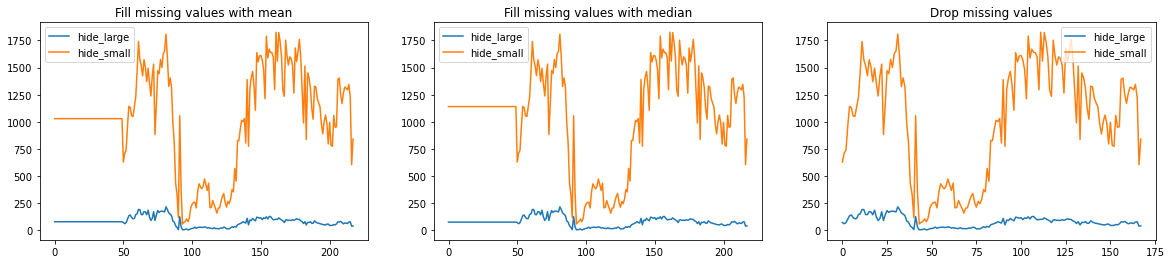

In [68]:
plt.figure(figsize=(20, 4))

plt.subplot(131)
trace_fillna_mean.hide_large.plot(kind='line')
trace_fillna_mean.hide_small.plot(kind='line')
plt.legend(['hide_large', 'hide_small']), plt.title('Fill missing values with mean')

plt.subplot(132)
trace_fillna_median.hide_large.plot(kind='line')
trace_fillna_median.hide_small.plot(kind='line')
plt.legend(['hide_large', 'hide_small']), plt.title('Fill missing values with median')

plt.subplot(133)
trace_dropna.hide_large.plot(kind='line')
trace_dropna.hide_small.plot(kind='line')
plt.legend(['hide_large', 'hide_small']), plt.title('Drop missing values')

In [69]:
trace_dropna.head()

,date,casual_contacts,hide_large,hide_small
0,2021-04-20,18550,70.0,628.0
1,2021-04-21,18219,59.0,710.0
2,2021-04-22,21050,69.0,737.0
3,2021-04-23,33945,102.0,959.0
4,2021-04-24,42312,133.0,1142.0


In [50]:
trace_dropna[trace_dropna.duplicated()]

,date,casual_contacts,hide_large,hide_small


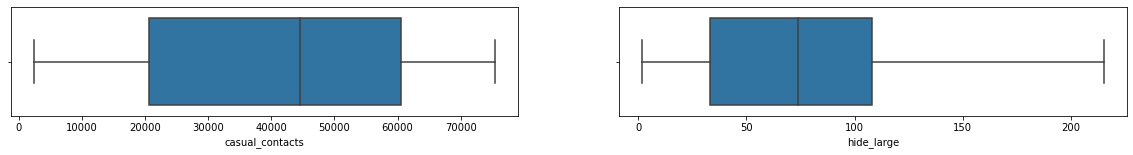

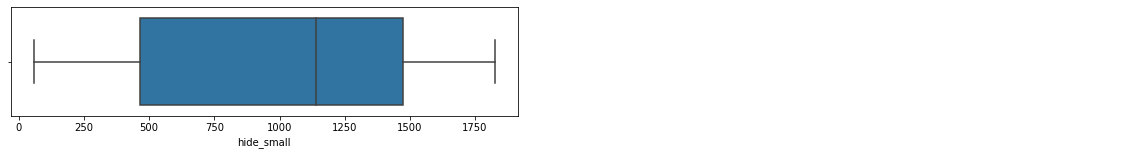

In [53]:
check_outlier(trace_dropna)

In [81]:
info_by_date(trace_dropna, 'casual_contacts')

The day with least casual_contacts:


,date,casual_contacts,hide_large,hide_small
43,2021-06-02,2407,3.0,57.0


The day with most casual_contacts:


,date,casual_contacts,hide_large,hide_small
113,2021-08-11,75409,113.0,1823.0


In [82]:
info_by_date(trace_dropna, 'hide_large')

The day with least hide_large:


,date,casual_contacts,hide_large,hide_small
47,2021-06-06,9360,2.0,78.0


The day with most hide_large:


,date,casual_contacts,hide_large,hide_small
31,2021-05-21,55725,215.0,1809.0


In [83]:
info_by_date(trace_dropna, 'hide_small')

The day with least hide_small:


,date,casual_contacts,hide_large,hide_small
43,2021-06-02,2407,3.0,57.0


The day with most hide_small:


,date,casual_contacts,hide_large,hide_small
111,2021-08-09,72502,100.0,1826.0


### Pickle the Datasets

Pickle all the cleaned data frames for later use.

T

| Dataset               | Start date | End date   | Number of Rows |
| --------------------- | ---------- | ---------- | -------------- |
| checkin_malaysia      | 2020-12-01 | 2021-10-05 | 309            |
| checkin_state         | 2020-12-01 | 2021-10-05 | 4944           |
| checkin_malaysia_time | 2020-12-01 | 2021-10-05 | 309            |
| trace_dropna          | 2021-04-20 | 2021-10-05 | 168            |


In [45]:
pickle.dump(checkin_malaysia, open('pickle_files/checkin_malaysia.pkl', 'wb'))
pickle.dump(checkin_state, open('pickle_files/checkin_state.pkl', 'wb'))
pickle.dump(checkin_malaysia_time, open('pickle_files/checkin_malaysia_time.pkl', 'wb'))
pickle.dump(trace_dropna, open('pickle_files/trace_malaysia.pkl', 'wb'))


In [123]:
trace_malaysia

,date,casual_contacts,hide_large,hide_small
0,2021-03-01,7847,NaN,NaN
1,2021-03-02,6419,NaN,NaN
2,2021-03-03,6903,NaN,NaN
3,2021-03-04,7000,NaN,NaN
4,2021-03-05,9152,NaN,NaN
...,...,...,...,...
213,2021-09-30,59749,61.0,1294.0
214,2021-10-01,63159,75.0,1345.0
215,2021-10-02,63846,77.0,1224.0
216,2021-10-03,32301,37.0,604.0


#### Minor finding
- The checkin_state doesn't align with checkin_malaysia and checkin_malaysia_time.csv

# Documentation for MySejahtera datasets

_Note: As per the MySejahtera privacy policy, individual-level check-in data is purged after 90 days. These summary statistics are stored only as aggregated totals; MySejahtera does not store the underlying data. Consequently, data revisions are not possible for dates more than 90 days ago, even if an inconsistency is spotted._

## File naming convention

1) `checkin_malaysia.csv`: Static name; file is updated by 1500hrs daily<br>
2) `checkin_malaysia_time.csv`: Static name; file is updated by 1500hrs daily<br>
3) `trace_malaysia.csv`: Static name; file is updated by 1500hrs daily<br>

## Variables and Methodology

1) `date`: yyyy-mm-dd format; data correct as of 2359hrs on that date<br>
2) `checkins`: number of checkins at all locations registered on MySejahtera<br>
3) `unique_ind`: number of unique accounts which checked in<br>
4) `unique_loc`: number of unique premises checked into<br>
5) `i`: in the time density file, checkins are aggregated by half-hour buckets, giving 48 in total; bucket `i` corresponds to the ith half-hour slot of the day. for instance, `i = 0` corresponds to 0000 - 0029; `i = 31` corresponds to 1500 - 1529.<br>
6) `casual_contacts`: number of casual contacts identified and notified by CPRC's automated contact tracing system<br>
7) `hide_large`: number of large hotspots identified by CPRC's hotspot identification system<br>
8) `hide_small`: number of small hotspots identified by CPRC's hotspot identification system<br>